<a href="https://colab.research.google.com/github/Bishal-Nengminja/Financial_Fraud_Detection_System/blob/main/Financial_Fraud_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

**2. Load & Explore the Data**

In [ ]:
# Load your dataset
df = pd.read_csv('AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Initial Inspection

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.columns.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


Target Variable Analysis

In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


**3. Exploratory Data Analysis (EDA)**

- Show fraud vs non-fraud distribution:

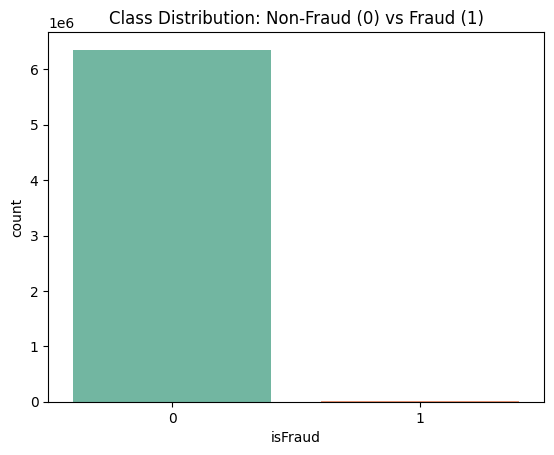

In [ ]:
sns.countplot(x='isFraud', data=df, palette='Set2')
plt.title('Class Distribution: Non-Fraud (0) vs Fraud (1)')
plt.show()

Data Types and Uniqueness

In [ ]:
for col in df.columns:
    print(f"{col:20}: {df[col].nunique()} unique values")

step                : 743 unique values
type                : 5 unique values
amount              : 5316900 unique values
nameOrig            : 6353307 unique values
oldbalanceOrg       : 1845844 unique values
newbalanceOrig      : 2682586 unique values
nameDest            : 2722362 unique values
oldbalanceDest      : 3614697 unique values
newbalanceDest      : 3555499 unique values
isFraud             : 2 unique values
isFlaggedFraud      : 2 unique values


Transaction Type Analysis

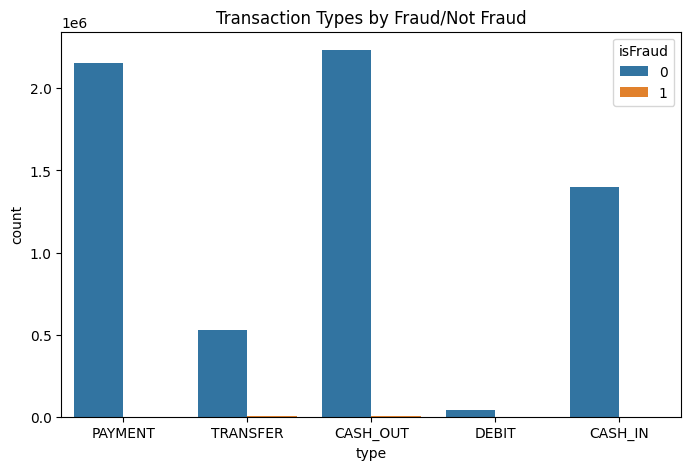

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Types by Fraud/Not Fraud')
plt.show()

Amount and Balance Distributions

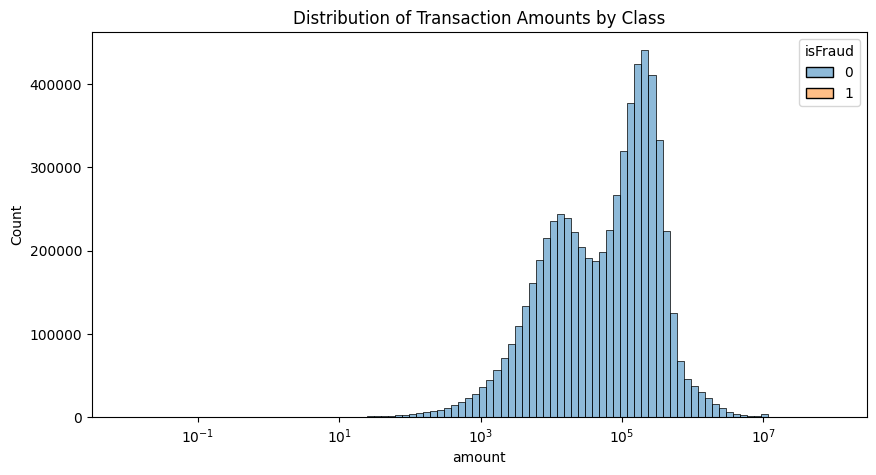

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='amount', hue='isFraud', bins=100, log_scale=True)
plt.title('Distribution of Transaction Amounts by Class')
plt.show()

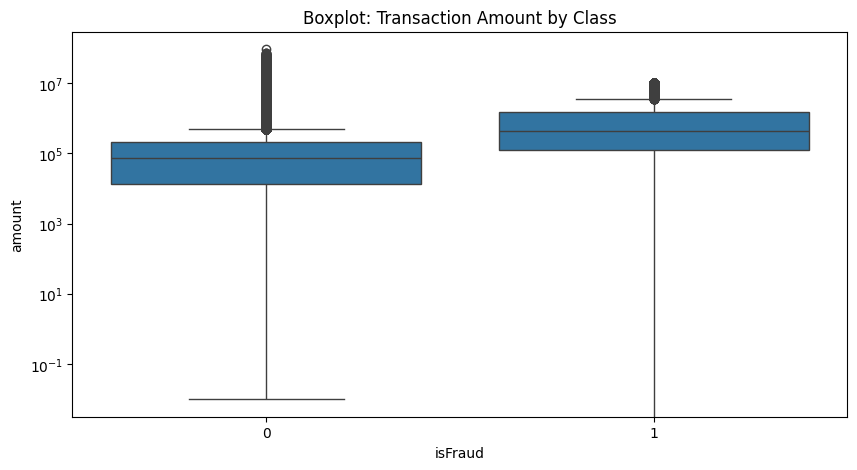

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Boxplot: Transaction Amount by Class')
plt.yscale('log')
plt.show()

Account Balance Changes for Frauds

In [ ]:
if 'balanceDiffOrig' not in df.columns:
    df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
if 'balanceDiffDest' not in df.columns:
    df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

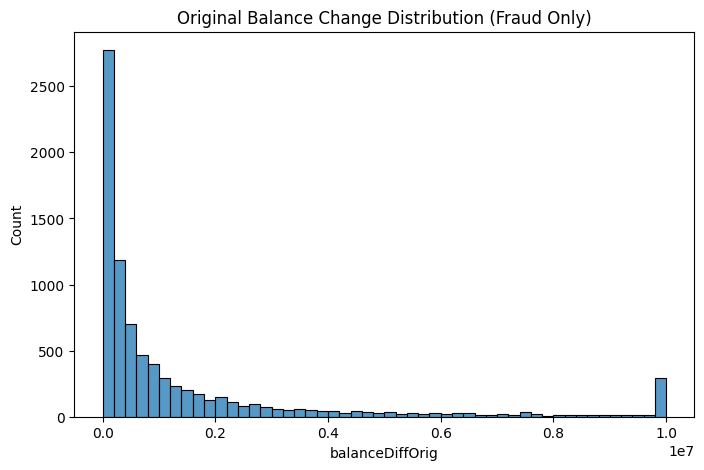

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df[df['isFraud']==1], x='balanceDiffOrig', bins=50)
plt.title('Original Balance Change Distribution (Fraud Only)')
plt.show()

Correlation Matrix

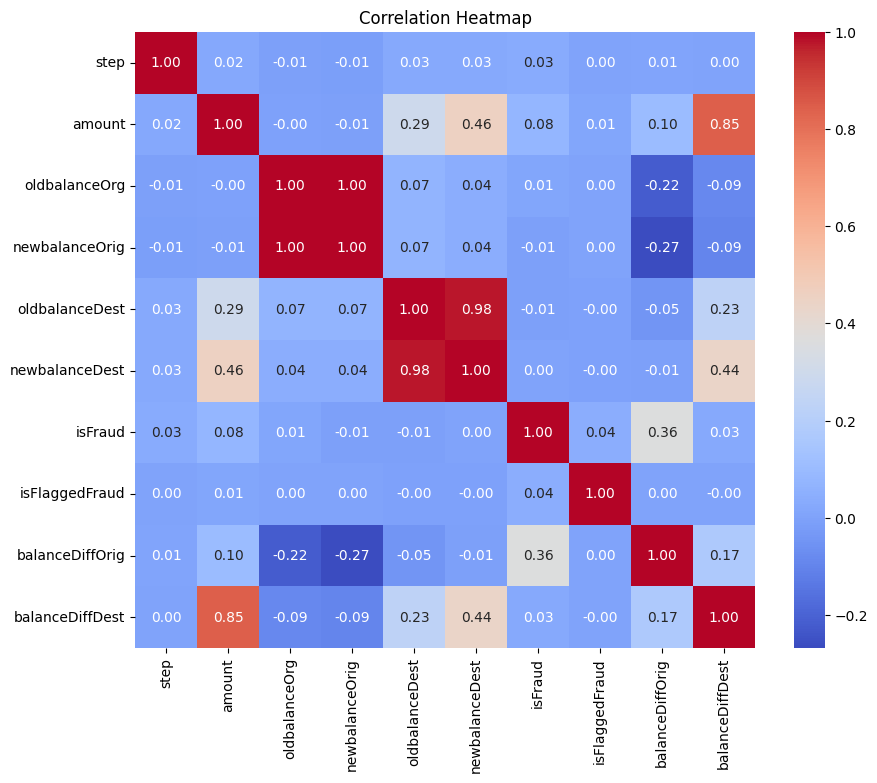

In [ ]:
plt.figure(figsize=(10,8))
#Selecting only numerical columns before calculating correlation
df_numeric = df.select_dtypes(include=np.number)
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Explore Outliers and Some "Obvious" Frauds

In [ ]:
df.nlargest(5, 'amount')[['amount', 'type', 'isFraud']]

,amount,type,isFraud
3686583,92445516.64,TRANSFER,0
4060598,73823490.36,TRANSFER,0
4146397,71172480.42,TRANSFER,0
3946920,69886731.30,TRANSFER,0
3911956,69337316.27,TRANSFER,0


In [ ]:
high_risk_mask = (df['isFraud']==1) & (df['oldbalanceOrg']==df['amount'])
num_hr = high_risk_mask.sum()
print(f"\nNumber of frauds where oldbalanceOrg == amount: {num_hr}")


Number of frauds where oldbalanceOrg == amount: 8034


**4. Feature Engineering**

In [ ]:
df = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

In [ ]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

**5. Train-Test Split**

In [ ]:
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

**6. Encode Categorical Feature**

In [ ]:
# OneHotEncode 'type'
enc = OneHotEncoder(drop='first', sparse_output=False)
enc.fit(X_train[['type']])

OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
# Transform and concatenate encoded columns
def encode_and_concat(X_raw):
    type_encoded = enc.transform(X_raw[['type']])
    X_num = X_raw.drop(['type'], axis=1).reset_index(drop=True)
    X_full = pd.concat(
        [X_num, pd.DataFrame(type_encoded, columns=enc.get_feature_names_out(['type']))],
        axis=1
    )
    return X_full

X_train_enc = encode_and_concat(X_train)
X_test_enc = encode_and_concat(X_test)

**7. Scale Numeric Features**

In [ ]:
numeric_cols = [
    'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest',
    'balanceDiffOrig', 'balanceDiffDest'
]
scaler = StandardScaler()
X_train_enc[numeric_cols] = scaler.fit_transform(X_train_enc[numeric_cols])
X_test_enc[numeric_cols] = scaler.transform(X_test_enc[numeric_cols])

**8. Model Training Using Class Weight**

In [ ]:
clf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train_enc, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

**9. Evaluation & Visualization**

In [ ]:
y_pred = clf.predict(X_test_enc)
y_pred_proba = clf.predict_proba(X_test_enc)[:,1]

In [ ]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999   1270881
           1     0.9731    0.8131    0.8859      1643

    accuracy                         0.9997   1272524
   macro avg     0.9864    0.9066    0.9429   1272524
weighted avg     0.9997    0.9997    0.9997   1272524



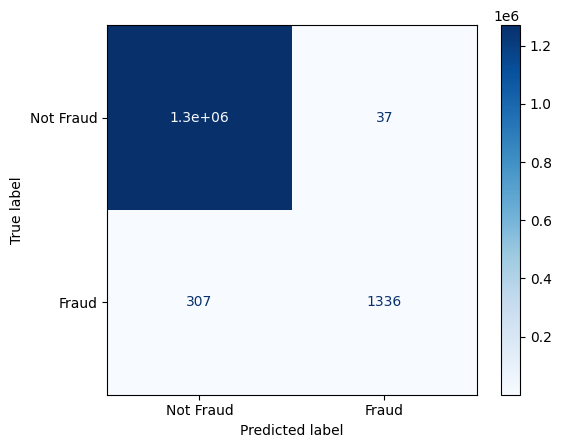

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.show()

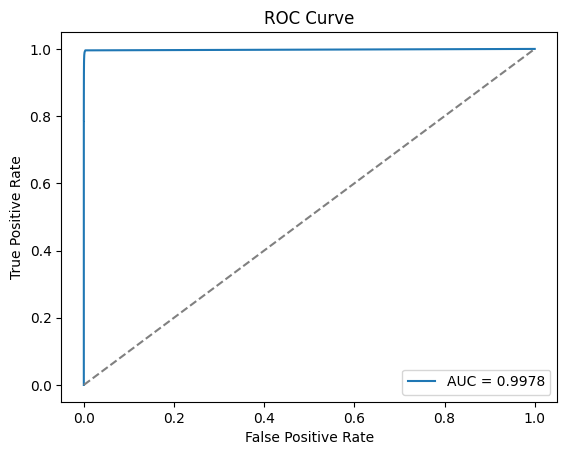

In [ ]:
# ROC Curve and AUC
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0,1],[0,1],"--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**10. Feature Importance (Explainability)**

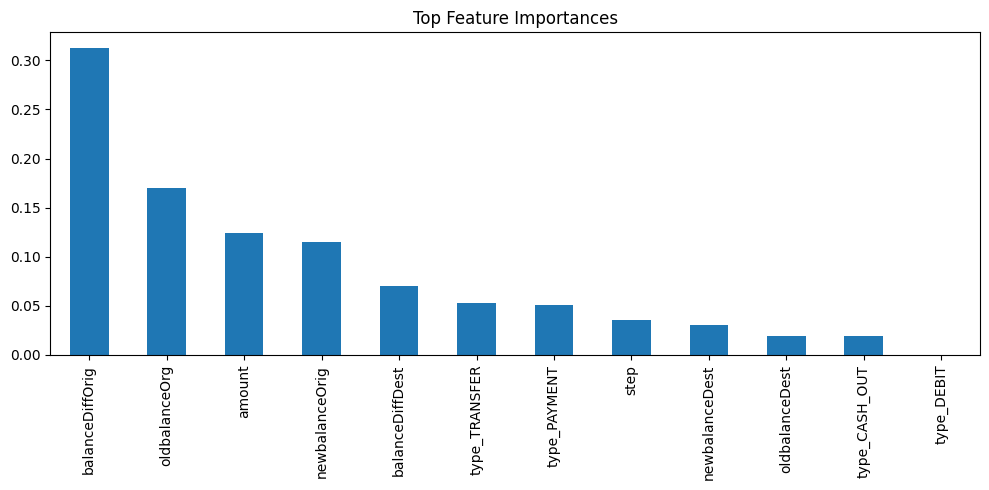

In [ ]:
importances = clf.feature_importances_
features = X_train_enc.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,5))
feat_imp.head(15).plot(kind='bar')
plt.title('Top Feature Importances')
plt.tight_layout()
plt.show()

**11. Example: Single Prediction Interface**

In [ ]:
def predict_fraud(input_dict):
    df_input = pd.DataFrame([input_dict])
    df_input['balanceDiffOrig'] = df_input['oldbalanceOrg'] - df_input['newbalanceOrig']
    df_input['balanceDiffDest'] = df_input['newbalanceDest'] - df_input['oldbalanceDest']
    X_part = encode_and_concat(df_input)
    X_part[numeric_cols] = scaler.transform(X_part[numeric_cols])
    pred = clf.predict(X_part)[0]
    proba = clf.predict_proba(X_part)[0,1]
    print(f'Prediction: {"FRAUD" if pred else "NOT FRAUD"} (Probability: {proba:.2%})')

# Example usage:
sample = {
    "step": 1, "type": "TRANSFER", "amount": 181.00, "oldbalanceOrg": 181.0, "newbalanceOrig": 0.0,
    "oldbalanceDest": 0.0, "newbalanceDest": 0.0
}
predict_fraud(sample)

Prediction: FRAUD (Probability: 94.00%)
